In [6]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import visuals as vs
%matplotlib inline

try:
    data = pd.read_csv("SamrtHome.csv")
    data.drop(['Date', 'ST', 'ET'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 48 samples with 15 features each.


In [7]:
# Display a description of the dataset
display(data.describe())

,Television,Laptop,Washing Machine,Fan,Refrigerator,Air Conditioner,Tred Mill,Microwave,Hair Dryer,Chimney,Heater,Home Theater,Dish Washer,Kettle,Iron Box
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,1.544850,0.510304,0.449179,1.242063,3.389217,1.569071,0.0,0.586123,0.046367,0.296590,0.248654,0.444250,0.332742,0.537887,0.0
std,1.658332,1.195636,1.505657,1.602978,1.637518,1.612900,0.0,1.123953,0.178357,0.708924,0.691504,0.819572,0.902639,1.002864,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,3.237750,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.181050,0.000000,0.000000,0.000000,4.211400,1.107250,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,2.794725,0.000000,0.000000,2.365400,4.562300,3.225400,0.0,0.000000,0.000000,0.000000,0.000000,0.309125,0.000000,0.651725,0.0
max,4.325600,4.123600,5.458900,5.325400,4.562300,3.569800,0.0,3.245600,0.856400,2.546800,2.365800,2.365400,3.265400,3.214500,0.0


In [8]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [1, 32, 256] 
# Note: I tried 128. But it is an outlier in subsequent questions - not suitable to be sampled here

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


C:\Users\Sravya\Anaconda3\envs\MiningActivityPattern\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


,Television,Laptop,Washing Machine,Fan,Refrigerator,Air Conditioner,Tred Mill,Microwave,Hair Dryer,Chimney,Heater,Home Theater,Dish Washer,Kettle,Iron Box
0,2.3654,0.0000,0.0,1.2365,3.2145,0.0,0.0,0.0,0.0,0.0,1.2365,0.0,0.0,3.2145,0.0
1,0.0000,4.1236,0.0,0.0000,2.3365,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


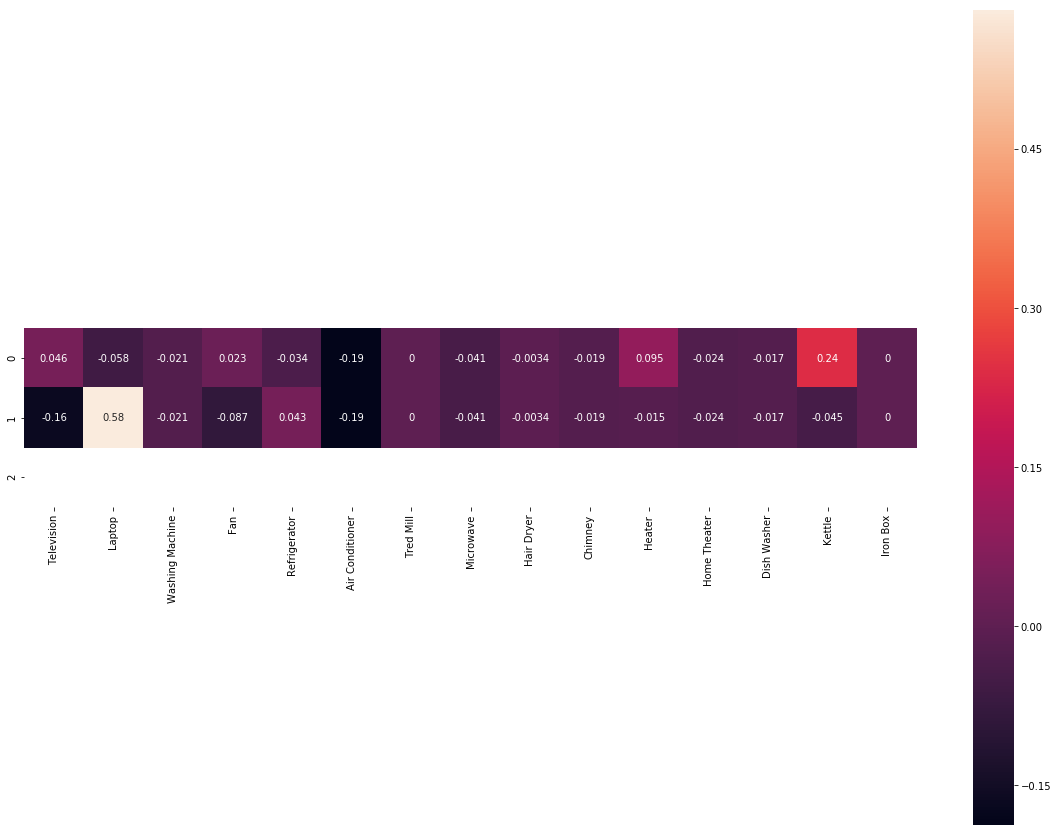

In [44]:
import seaborn as sns
import matplotlib.pylab as plt
data_normalized_by_row = data.div(data.sum(axis=1), axis=0)
samples_normalized_by_row = samples.div(samples.sum(axis=1), axis=0)
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(samples_normalized_by_row - data_normalized_by_row.mean(), 
            annot=True, cbar=True, square=True,ax=ax)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

feature_pred_scores = []
for c in data.columns:
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop(c, 1)

    # TODO: Split the data into training and testing sets using the given feature as the target
    X, Xv, y, yv = train_test_split(new_data, data[c], test_size=0.25, random_state=42)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=42)
    regressor.fit(X, y)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(Xv, yv)
    feature_pred_scores.append((score,c))

for score, c in sorted(feature_pred_scores):
    print 'Prediction score is [%+.4f] for [%s]'%(score,c)


Prediction score is [-3.3275] for [Home Theater]
Prediction score is [+0.1609] for [Television]
Prediction score is [+0.1815] for [Air Conditioner]
Prediction score is [+0.8085] for [Chimney]
Prediction score is [+0.8145] for [Hair Dryer]
Prediction score is [+0.8347] for [Refrigerator]
Prediction score is [+0.8975] for [Microwave]
Prediction score is [+0.9754] for [Kettle]
Prediction score is [+0.9998] for [Fan]
Prediction score is [+1.0000] for [Dish Washer]
Prediction score is [+1.0000] for [Heater]
Prediction score is [+1.0000] for [Iron Box]
Prediction score is [+1.0000] for [Laptop]
Prediction score is [+1.0000] for [Tred Mill]
Prediction score is [+1.0000] for [Washing Machine]
